In [1]:
import powerlaw

# Generates synthetic data
data = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(20000)

# Fits data to power law
fit = powerlaw.Fit(data)

print('xmin:', fit.xmin)
print('alpha:', fit.alpha)

Calculating best minimal value for power law fit
xmin: 1.000030536202282
alpha: 2.504621352821387


In [2]:
def compare_distributions(data, distribution_1, distribution_2, xmin=1):
    fit = powerlaw.Fit(data, xmin=xmin)
    LTR, significance = fit.distribution_compare(distribution_1, distribution_2, normalized_ratio=True)
    if LTR > 0:
        print('{} is a better fit than {}. p-value: {:0.5f}'.format(distribution_1, distribution_2, significance))
    else:
        print('{} is a better fit than {}. p-value: {:0.5f}'.format(distribution_2, distribution_1, significance))

In [3]:
# Comparison with few data points

data1 = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(100)
compare_distributions(data1, 'power_law', 'lognormal_positive')
compare_distributions(data1, 'power_law', 'exponential')
compare_distributions(data1, 'power_law', 'truncated_power_law')

lognormal_positive is a better fit than power_law. p-value: 0.95558
power_law is a better fit than exponential. p-value: 0.15201


Assuming nested distributions


truncated_power_law is a better fit than power_law. p-value: 0.09785


In [4]:
# Comparison with few data points, run2

data1 = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(100)
compare_distributions(data1, 'power_law', 'lognormal_positive')
compare_distributions(data1, 'power_law', 'exponential')
compare_distributions(data1, 'power_law', 'truncated_power_law')

power_law is a better fit than lognormal_positive. p-value: 0.25569
power_law is a better fit than exponential. p-value: 0.13215
truncated_power_law is a better fit than power_law. p-value: 0.47100


Assuming nested distributions


In [5]:
# Comparison with many data points

data2 = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(100000)
compare_distributions(data2, 'power_law', 'lognormal_positive')
compare_distributions(data2, 'power_law', 'exponential')
compare_distributions(data2, 'power_law', 'truncated_power_law')

power_law is a better fit than lognormal_positive. p-value: 0.00000
power_law is a better fit than exponential. p-value: 0.00000


Assuming nested distributions


truncated_power_law is a better fit than power_law. p-value: 0.91098


In [6]:
# Comparison with many data points, run2

data2 = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(100000)
compare_distributions(data2, 'power_law', 'lognormal_positive')
compare_distributions(data2, 'power_law', 'exponential')
compare_distributions(data2, 'power_law', 'truncated_power_law')

power_law is a better fit than lognormal_positive. p-value: 0.00000
power_law is a better fit than exponential. p-value: 0.00000


Assuming nested distributions


power_law is a better fit than truncated_power_law. p-value: 0.99244


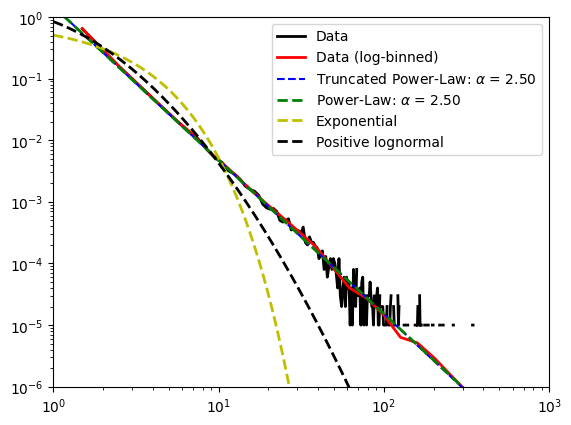

In [7]:
data2 = powerlaw.Power_Law(xmin=1, parameters=[2.5]).generate_random(100000)
fit2 = powerlaw.Fit(data2, xmin=1)
fig = fit2.plot_pdf(color='k', linear_bins=True, linewidth=2, **{'label': 'Data'})
fit2.plot_pdf(color='r', linewidth=2, **{'label': 'Data (log-binned)'})
fit2.truncated_power_law.plot_pdf(color='b',linestyle='--', **{'label': r'Truncated Power-Law: $\alpha$ = {:0.2f}'.format(fit.truncated_power_law.alpha)})
fit2.power_law.plot_pdf(color='g', linewidth=2, linestyle='--', **{'label': r'Power-Law: $\alpha$ = {:0.2f}'.format(fit.power_law.alpha)})
fit2.exponential.plot_pdf(color='y', linewidth=2, linestyle='--', **{'label': 'Exponential'})
fit2.lognormal_positive.plot_pdf(color='k', linewidth=2, linestyle='--', **{'label': 'Positive lognormal'})
plt.legend()
plt.xlim(1,1e3)
plt.ylim(1e-6,1e0);